In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl,glob
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
!pip install uproot
import uproot as ur

plt.rcParams["figure.figsize"] = (10, 8)


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
sidelength=31.3

def center_position(row,col):
    
    x=col*1.5*sidelength+sidelength/2
    y=row*np.sqrt(3)/2*sidelength+sidelength*np.sqrt(3)/2
    return x,y
def rowcol(X,Y):
    offsetX=0
    offsetY=0
    a=np.mod((Y-offsetY)/(np.sqrt(3)*sidelength),1)
    b=np.mod((X-offsetX)/(3*sidelength),1)
    c= np.floor((X-offsetX)/(3*sidelength/2))+\
            (b<1/2)*(-abs(a-.5)<(b-.5)*3)+(b>1/2)*(abs(a-.5)-.5<(b-1)*3)
    r=np.floor((Y-offsetY)/(np.sqrt(3)*sidelength/2))
    r-=(r+c)%2
    return r,c


['dd4hep/csv/truth_xy_2500.csv', 'dd4hep/csv/truth_xy_4000.csv', 'dd4hep/csv/truth_xy_4500.csv', 'dd4hep/csv/truth_xy_2000.csv', 'dd4hep/csv/truth_xy_3500.csv', 'dd4hep/csv/truth_xy_0.csv', 'dd4hep/csv/truth_xy_1500.csv', 'dd4hep/csv/truth_xy_500.csv', 'dd4hep/csv/truth_xy_1000.csv', 'dd4hep/csv/truth_xy_3000.csv']


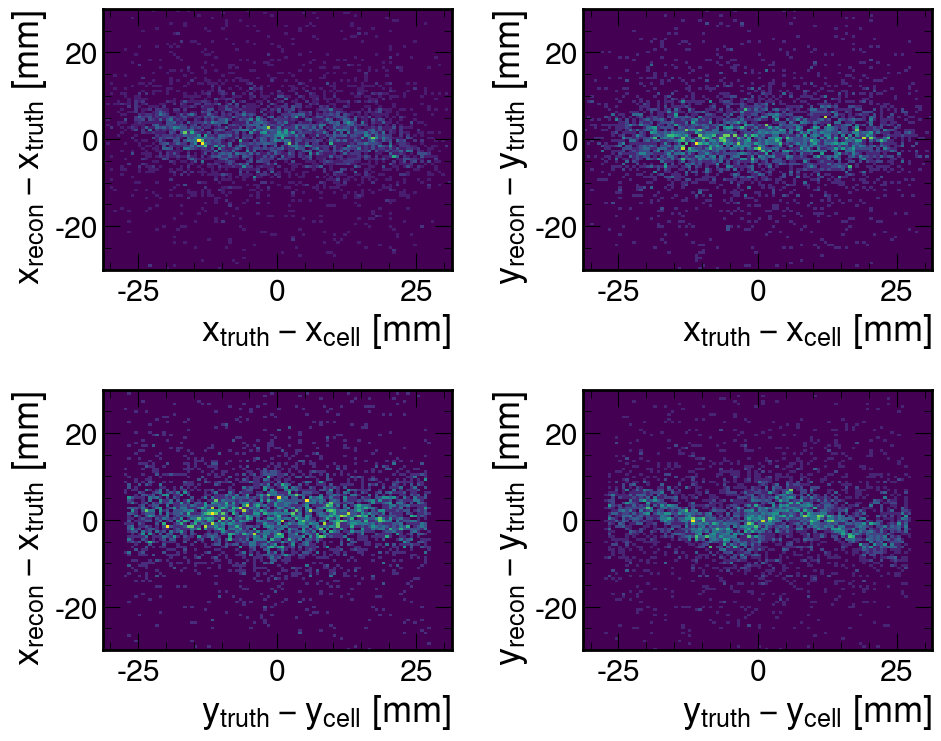

In [19]:
path="dd4hep/csv/truth_xy*.csv"
files=glob.glob(path)
print(files)
df = pd.concat(map(pd.read_csv, files))

xc,yc = center_position(*rowcol(df.x_truth,df.y_truth))

x_rel=df.x_truth-xc
y_rel=df.y_truth-yc
fig, axs=plt.subplots(2,2)
plt.sca(axs[0][0])
plt.xlabel("$x_{\\rm truth}-x_{\\rm cell}$ [mm]")
plt.ylabel("$x_{\\rm recon}-x_{\\rm truth}$ [mm]")
plt.hist2d(x_rel, df.dx_rw,)


plt.sca(axs[0][1])
plt.xlabel("$x_{\\rm truth}-x_{\\rm cell}$ [mm]")
plt.ylabel("$y_{\\rm recon}-y_{\\rm truth}$ [mm]")
plt.hist2d(x_rel, df.dy_rw, bins=100, range=((-sidelength, sidelength), (-30, 30)))

plt.sca(axs[1][0])
plt.xlabel("$y_{\\rm truth}-y_{\\rm cell}$ [mm]")
plt.ylabel("$x_{\\rm recon}-x_{\\rm truth}$ [mm]")
plt.hist2d(y_rel, df.dx_rw, bins=100, range=((-sidelength, sidelength), (-30, 30)))


plt.sca(axs[1][1])
plt.xlabel("$y_{\\rm truth}-y_{\\rm cell}$ [mm]")
plt.ylabel("$y_{\\rm recon}-y_{\\rm truth}$ [mm]")
plt.hist2d(y_rel, df.dy_rw, bins=100, range=((-sidelength, sidelength), (-30, 30)))

plt.tight_layout()
plt.show()

['dd4hep/csv/truth_xy_2500.csv', 'dd4hep/csv/truth_xy_4000.csv', 'dd4hep/csv/truth_xy_4500.csv', 'dd4hep/csv/truth_xy_2000.csv', 'dd4hep/csv/truth_xy_3500.csv', 'dd4hep/csv/truth_xy_0.csv', 'dd4hep/csv/truth_xy_1500.csv', 'dd4hep/csv/truth_xy_500.csv', 'dd4hep/csv/truth_xy_1000.csv', 'dd4hep/csv/truth_xy_3000.csv']


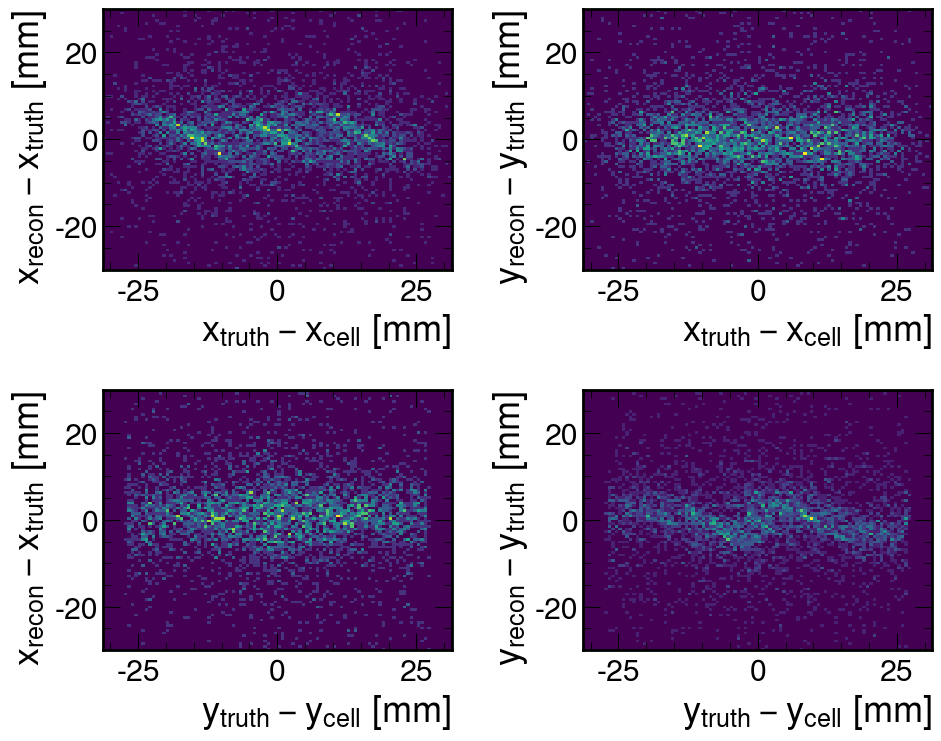

In [16]:
path="dd4hep/csv/truth_xy*.csv"
files=glob.glob(path)
print(files)
df = pd.concat(map(pd.read_csv, files))

xc,yc = center_position(*rowcol(df.x_truth,df.y_truth))

x_rel=df.x_truth-xc
y_rel=df.y_truth-yc
fig, axs=plt.subplots(2,2)
plt.sca(axs[0][0])
plt.xlabel("$x_{\\rm truth}-x_{\\rm cell}$ [mm]")
plt.ylabel("$x_{\\rm recon}-x_{\\rm truth}$ [mm]")
plt.hist2d(x_rel, df.dx, bins=100, range=((-sidelength, sidelength), (-30, 30)))


plt.sca(axs[0][1])
plt.xlabel("$x_{\\rm truth}-x_{\\rm cell}$ [mm]")
plt.ylabel("$y_{\\rm recon}-y_{\\rm truth}$ [mm]")
plt.hist2d(x_rel, df.dy, bins=100, range=((-sidelength, sidelength), (-30, 30)))

plt.sca(axs[1][0])
plt.xlabel("$y_{\\rm truth}-y_{\\rm cell}$ [mm]")
plt.ylabel("$x_{\\rm recon}-x_{\\rm truth}$ [mm]")
plt.hist2d(y_rel, df.dx, bins=100, range=((-sidelength, sidelength), (-30, 30)))


plt.sca(axs[1][1])
plt.xlabel("$y_{\\rm truth}-y_{\\rm cell}$ [mm]")
plt.ylabel("$y_{\\rm recon}-y_{\\rm truth}$ [mm]")
plt.hist2d(y_rel, df.dy, bins=100, range=((-sidelength, sidelength), (-30, 30)))

plt.tight_layout()
plt.show()

In [5]:
def get_mean_std(a, window=(-20, 20)):
    a=a[(a>window[0])&(a<window[1])]
    return np.mean(a), np.std(a)

['dd4hep/csv/truth_xy_2500.csv', 'dd4hep/csv/truth_xy_4000.csv', 'dd4hep/csv/truth_xy_4500.csv', 'dd4hep/csv/truth_xy_2000.csv', 'dd4hep/csv/truth_xy_3500.csv', 'dd4hep/csv/truth_xy_0.csv', 'dd4hep/csv/truth_xy_1500.csv', 'dd4hep/csv/truth_xy_500.csv', 'dd4hep/csv/truth_xy_1000.csv', 'dd4hep/csv/truth_xy_3000.csv']


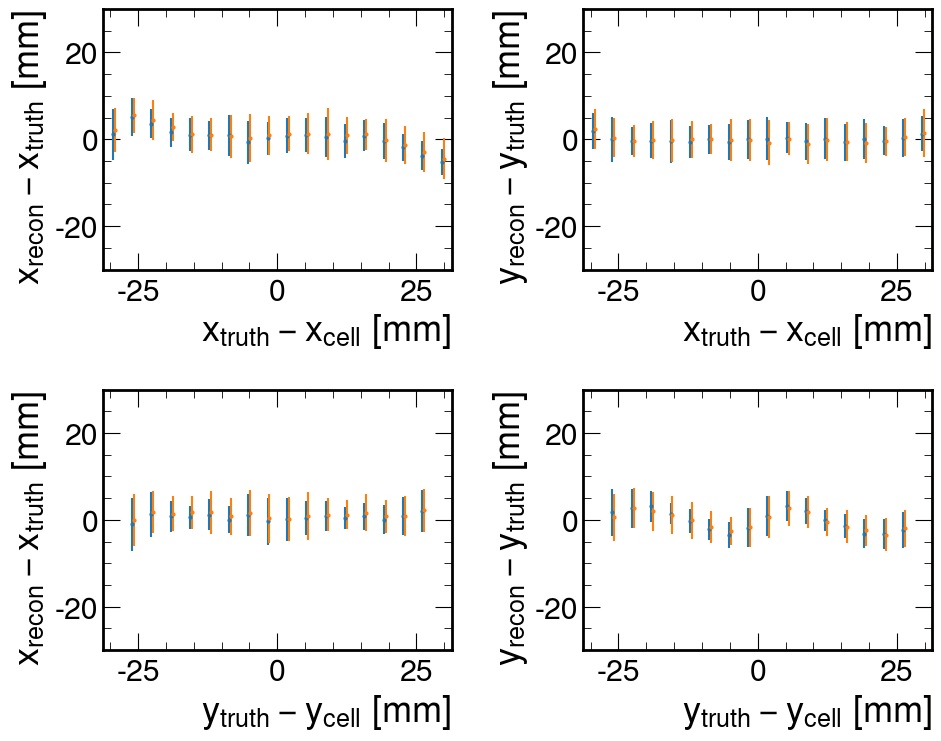

In [52]:
path="dd4hep/csv/truth_xy*.csv"
files=glob.glob(path)
print(files)
df = pd.concat(map(pd.read_csv, files))

df=df.query("mc_pz>100")
xc,yc = center_position(*rowcol(df.x_truth,df.y_truth))

x_rel=df.x_truth-xc
y_rel=df.y_truth-yc
rel=x_rel,y_rel
resid_rw=df.dx_rw,df.dy_rw
resid=df.dx,df.dy

fig, axs=plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        plt.sca(axs[i][j])
        plt.xlabel(f"${'xy'[i]}_{{\\rm truth}}-{'xy'[i]}_{{\\rm cell}}$ [mm]")
        plt.ylabel(f"${'xy'[j]}_{{\\rm recon}}-{'xy'[j]}_{{\\rm truth}}$ [mm]")
        partitions=np.linspace(-sidelength, sidelength, 19)
        
        shift=0
        for resid_set in resid_rw, resid:
            mean_resids=[]
            std_resids=[]
            bin_centers=[]
            for k in range(len(partitions)-1):
                #print(rel[i])
                slc = (rel[i]>partitions[k])&(rel[i]<partitions[k+1])

                a=resid_set[j][slc]
                mean_std=get_mean_std(a)
                mean_resids.append(mean_std[0])
                std_resids.append(mean_std[1])
                bin_centers.append((partitions[k]+partitions[k+1])/2+shift)
            plt.errorbar(bin_centers, mean_resids, std_resids, ls='', marker='o', ms=2)
            plt.ylim(-30, 30)
            plt.xlim(-sidelength, sidelength)
            shift+=0.1*(bin_centers[1]-bin_centers[0])



plt.tight_layout()
plt.show()

['dd4hep/csv/truth_xy_w0_7_4000.csv', 'dd4hep/csv/truth_xy_w0_7_2500.csv', 'dd4hep/csv/truth_xy_w0_7_2000.csv', 'dd4hep/csv/truth_xy_w0_7_500.csv', 'dd4hep/csv/truth_xy_w0_7_4500.csv', 'dd4hep/csv/truth_xy_w0_7_0.csv', 'dd4hep/csv/truth_xy_w0_7_1500.csv', 'dd4hep/csv/truth_xy_w0_7_3500.csv', 'dd4hep/csv/truth_xy_w0_7_3000.csv', 'dd4hep/csv/truth_xy_w0_7_1000.csv']


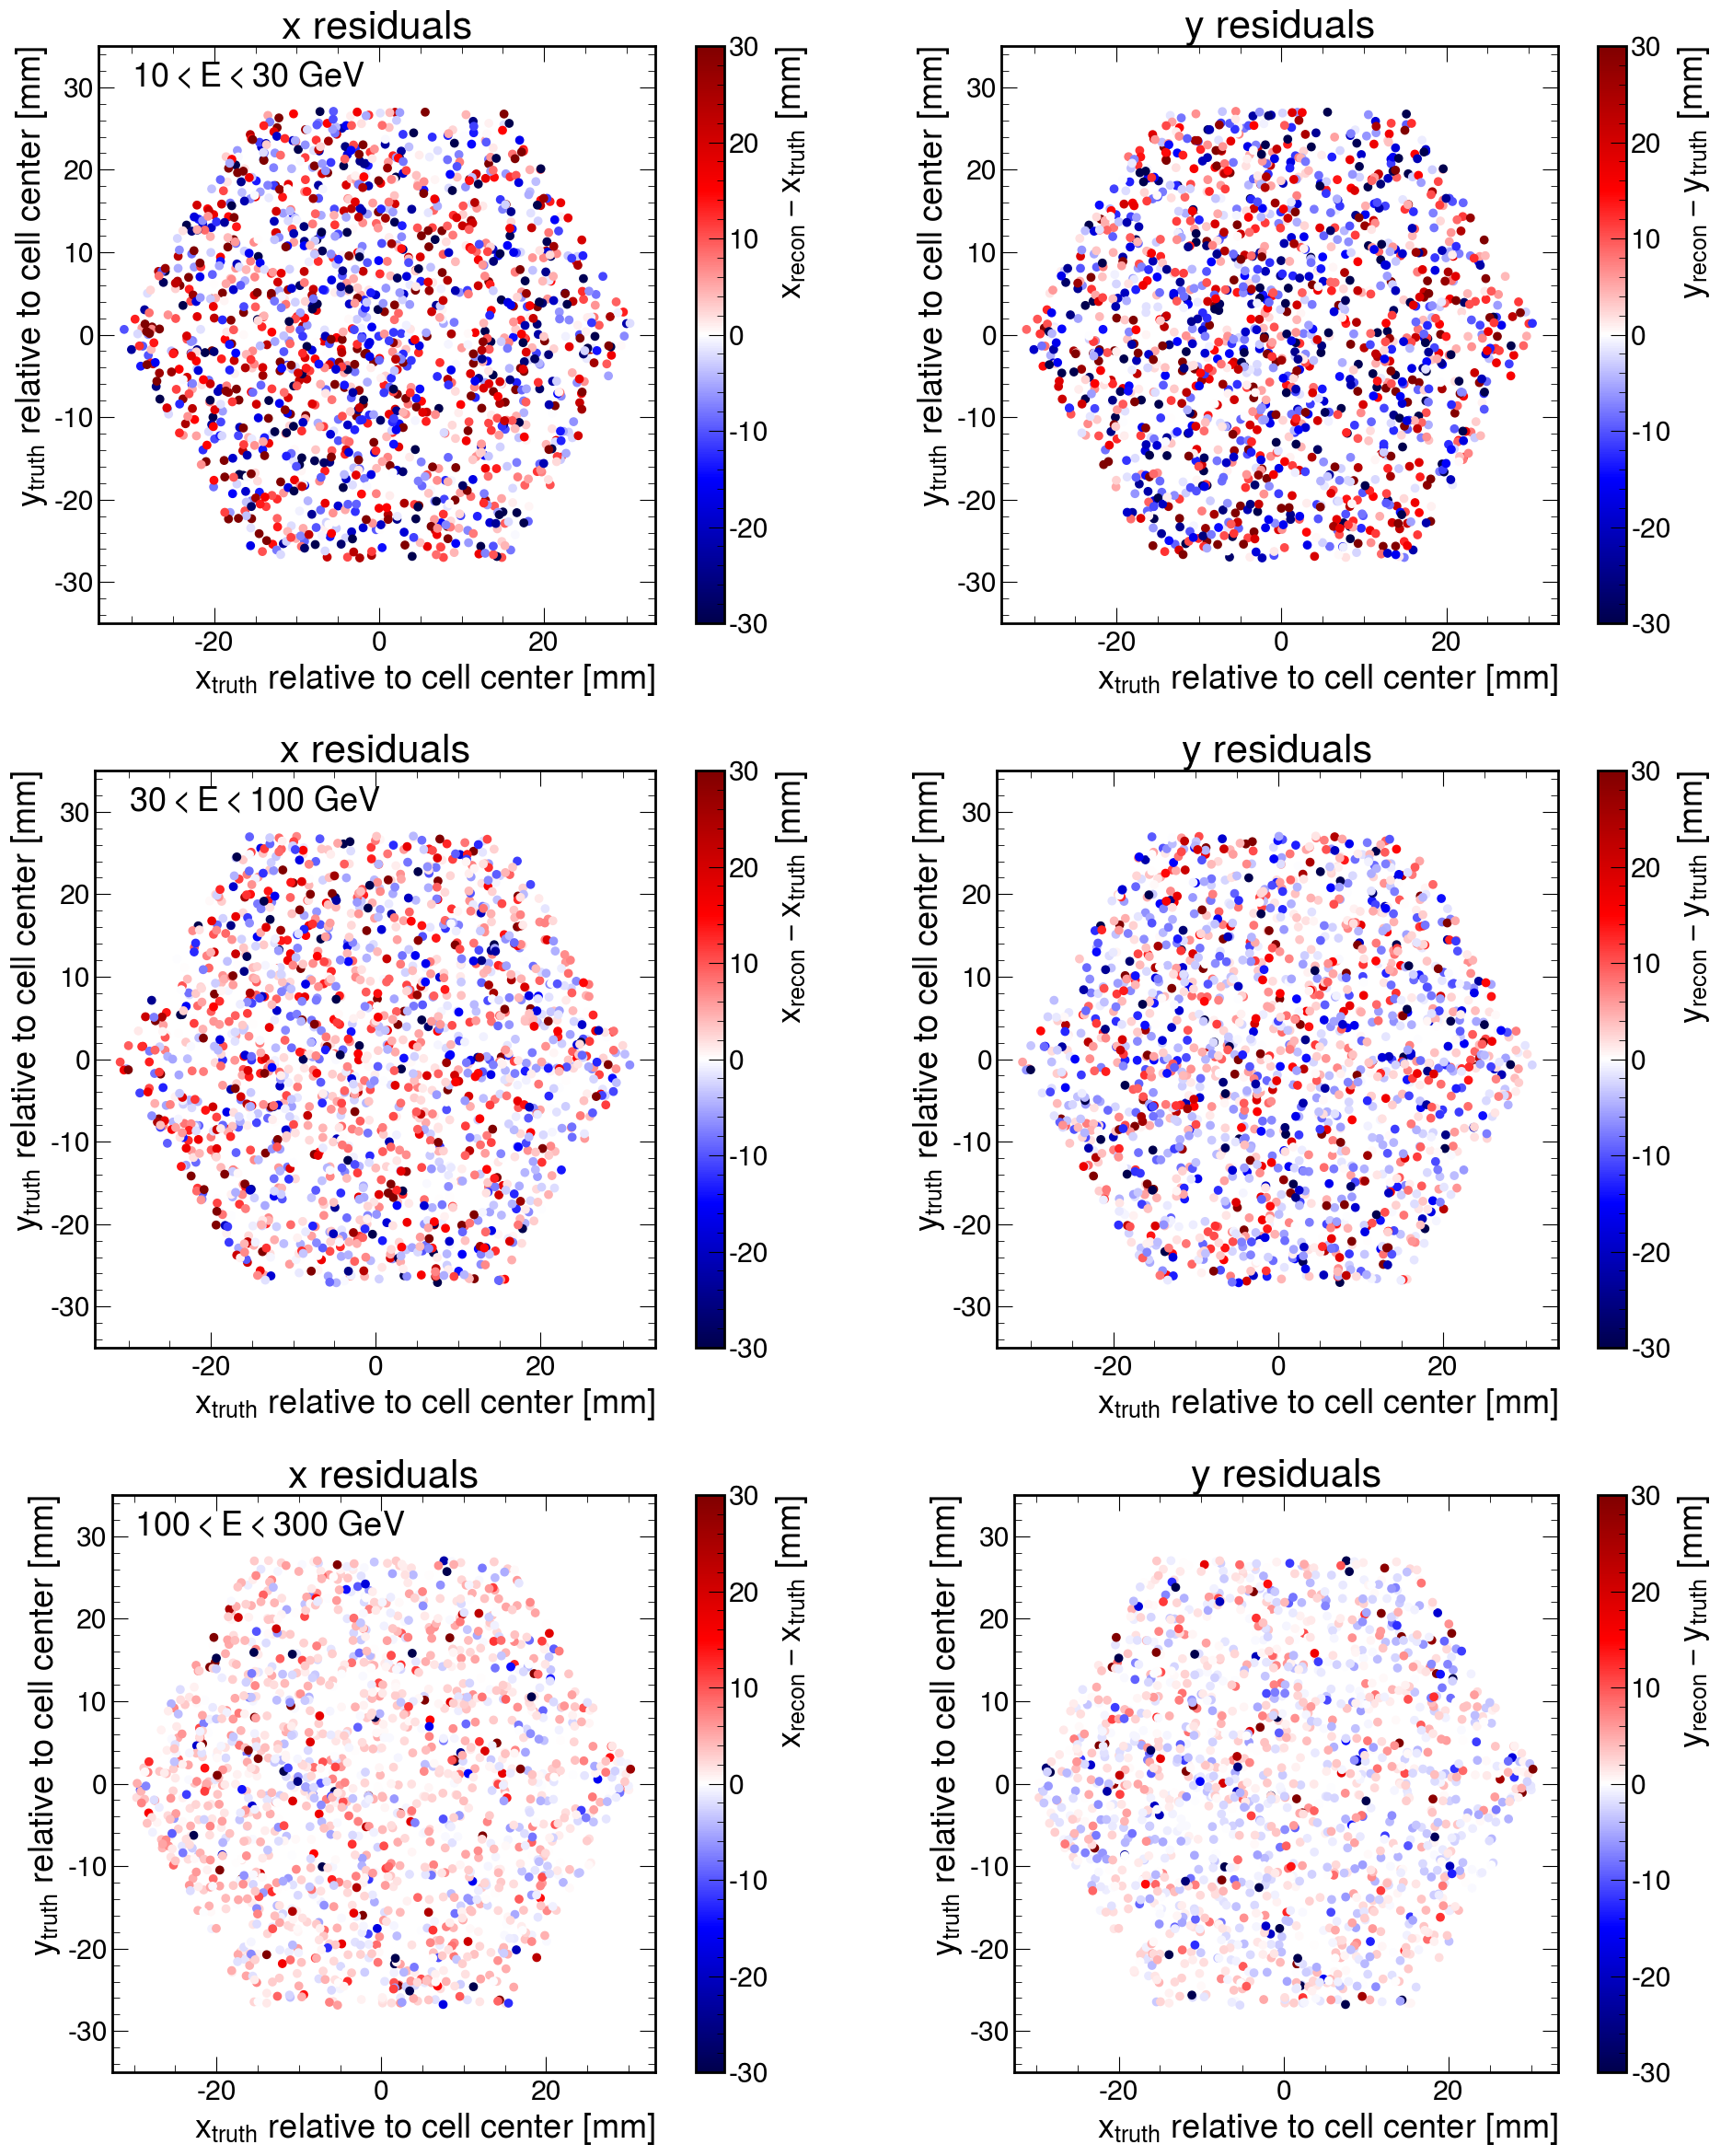

In [106]:
path="dd4hep/csv/truth_xy_w0_7_[0-9]*.csv"
files=glob.glob(path)
print(files)
df = pd.concat(map(pd.read_csv, files))

#df=df.query("mc_pz<50")
xc,yc = center_position(*rowcol(df.x_truth,df.y_truth))

x_rel=df.x_truth-xc
y_rel=df.y_truth-yc
rel=x_rel,y_rel
resid_rw=df.dx_rw,df.dy_rw
resid=df.dx,df.dy

fig, axs= plt.subplots(3,2, figsize=(20, 24))
for row, Erange in zip(axs, [(10,30),(30,100), (100, 300)]):
    slc=(df.mc_pz>Erange[0])&(df.mc_pz<Erange[1])
    row[0].text(-30,30, f"${Erange[0]}<E<{Erange[1]}$ GeV")
    for ax, field in zip(row, ("dx_rw", "dy_rw")):
        plt.sca(ax)
        cmap = mpl.cm.get_cmap('seismic')

        norm=mpl.colors.Normalize(vmin=-30, vmax=30)
        a=plt.scatter(x_rel[slc], y_rel[slc], color=cmap(norm(df[field][slc])))

        ax.set_aspect(1)
        cbar=plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
        #get the letter "x" or "y" for the label
        xy=field[1]
        cbar.set_label(f"${xy}_{{\\rm recon}}- {xy}_{{\\rm truth}}$ [mm]")
        plt.title(xy+" residuals")
        plt.xlabel("$x_{\\rm truth}$ relative to cell center [mm]")
        plt.ylabel("$y_{\\rm truth}$ relative to cell center [mm]")
        plt.ylim(-35, 35)
        
plt.tight_layout()
plt.show()

['dd4hep/csv/truth_xy_w0_4_3500.csv', 'dd4hep/csv/truth_xy_w0_4_500.csv', 'dd4hep/csv/truth_xy_w0_4_1500.csv', 'dd4hep/csv/truth_xy_w0_4_0.csv', 'dd4hep/csv/truth_xy_w0_4_1000.csv', 'dd4hep/csv/truth_xy_w0_4_3000.csv', 'dd4hep/csv/truth_xy_w0_4_2500.csv', 'dd4hep/csv/truth_xy_w0_4_4000.csv', 'dd4hep/csv/truth_xy_w0_4_4500.csv', 'dd4hep/csv/truth_xy_w0_4_2000.csv']


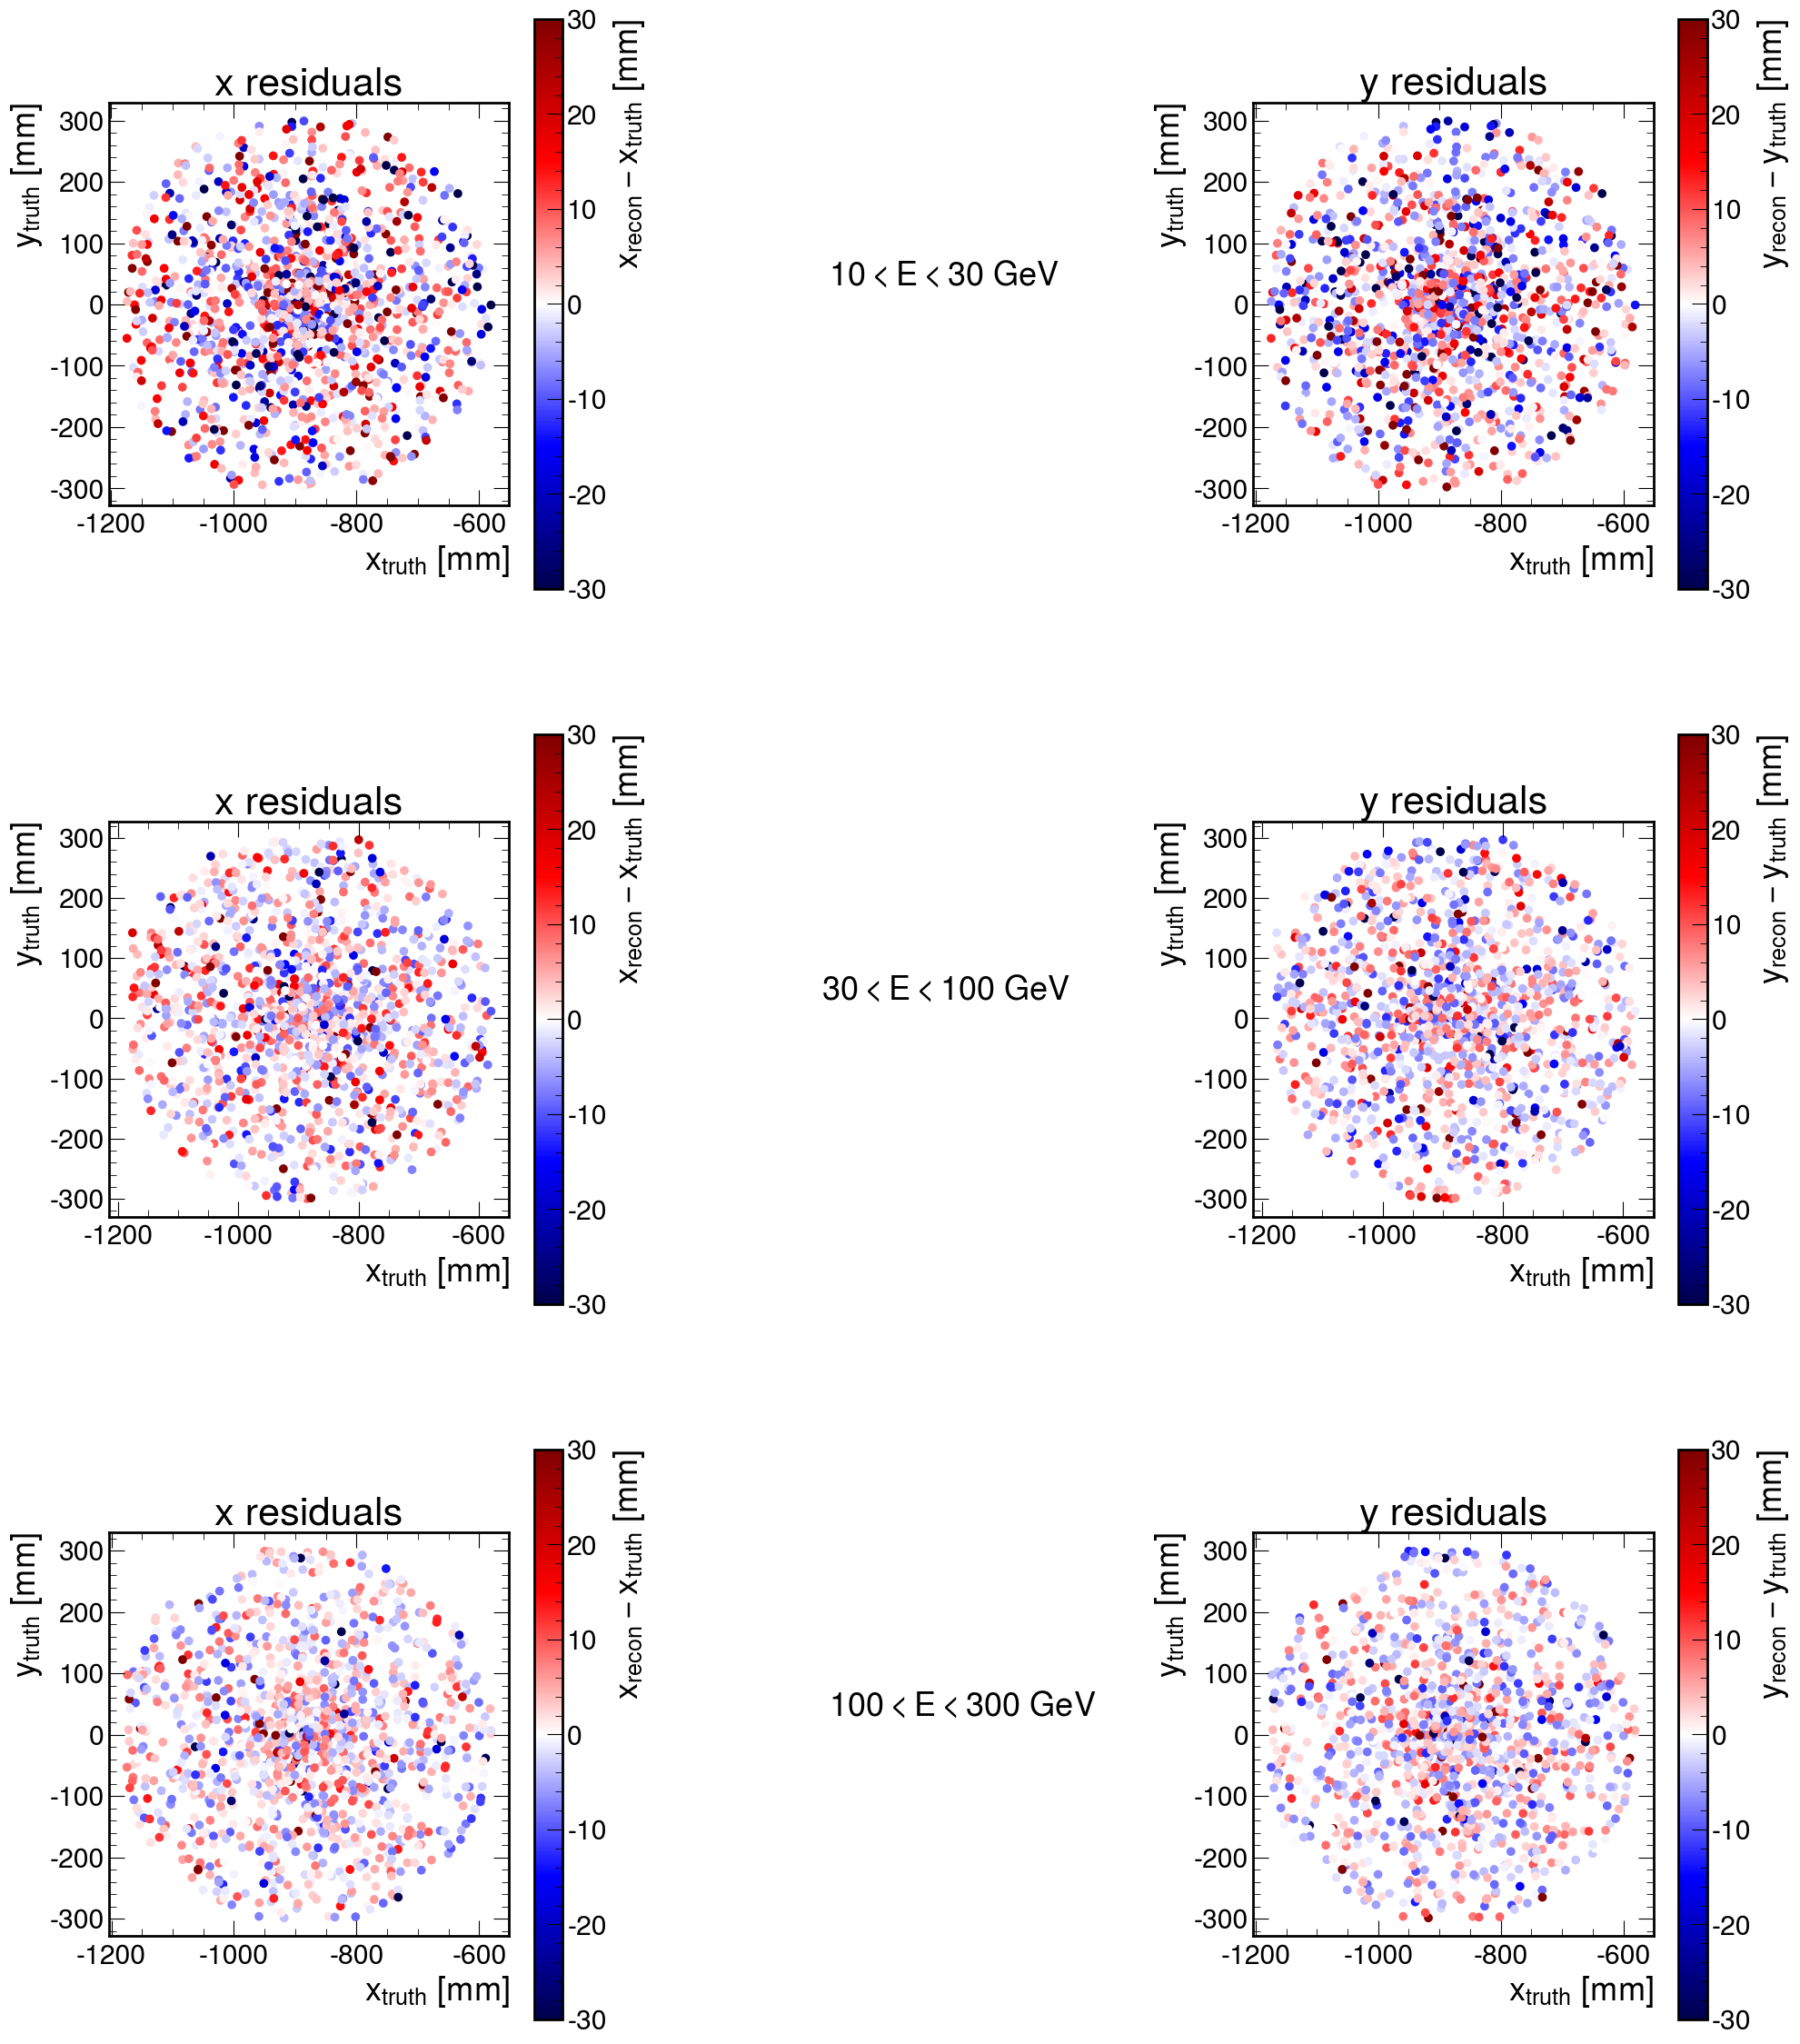

In [109]:
path="dd4hep/csv/truth_xy_w0_4_[0-9]*.csv"
files=glob.glob(path)
print(files)
df = pd.concat(map(pd.read_csv, files))

#df=df.query("mc_pz<50")
xc,yc = center_position(*rowcol(df.x_truth,df.y_truth))

x_rel=df.x_truth-xc
y_rel=df.y_truth-yc
rel=x_rel,y_rel
resid_rw=df.dx_rw,df.dy_rw
resid=df.dx,df.dy

fig, axs= plt.subplots(3,2, figsize=(20, 24))
for row, Erange in zip(axs, [(10,30),(30,100), (100, 300)]):
    slc=(df.mc_pz>Erange[0])&(df.mc_pz<Erange[1])
    row[0].text(-30,30, f"${Erange[0]}<E<{Erange[1]}$ GeV")
    for ax, field in zip(row, ("dx_rw", "dy_rw")):
        plt.sca(ax)
        cmap = mpl.cm.get_cmap('seismic')

        norm=mpl.colors.Normalize(vmin=-30, vmax=30)
        a=plt.scatter(df.x_truth[slc], df.y_truth[slc], color=cmap(norm(df[field][slc])))

        ax.set_aspect(1)
        cbar=plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
        #get the letter "x" or "y" for the label
        xy=field[1]
        cbar.set_label(f"${xy}_{{\\rm recon}}- {xy}_{{\\rm truth}}$ [mm]")
        plt.title(xy+" residuals")
        plt.xlabel("$x_{\\rm truth}$ [mm]")
        plt.ylabel("$y_{\\rm truth}$ [mm]")
        #plt.ylim(-35, 35)
        
plt.tight_layout()
plt.show()

['dd4hep/csv/truth_xy_w0_6_4000.csv', 'dd4hep/csv/truth_xy_w0_6_0.csv', 'dd4hep/csv/truth_xy_w0_6_2500.csv', 'dd4hep/csv/truth_xy_w0_6_2000.csv', 'dd4hep/csv/truth_xy_w0_6_4500.csv', 'dd4hep/csv/truth_xy_w0_6_500.csv', 'dd4hep/csv/truth_xy_w0_6_1500.csv', 'dd4hep/csv/truth_xy_w0_6_3500.csv', 'dd4hep/csv/truth_xy_w0_6_3000.csv', 'dd4hep/csv/truth_xy_w0_6_1000.csv']
[-1177.4023731  -1144.36814116 -1111.33390923 -1078.29967729
 -1045.26544535 -1012.23121342  -979.19698148  -946.16274955
  -913.12851761  -880.09428567  -847.06005374  -814.0258218
  -780.99158987  -747.95735793  -714.92312599  -681.88889406
  -648.85466212  -615.82043019  -582.78619825]
[-1177.4023731  -1144.36814116 -1111.33390923 -1078.29967729
 -1045.26544535 -1012.23121342  -979.19698148  -946.16274955
  -913.12851761  -880.09428567  -847.06005374  -814.0258218
  -780.99158987  -747.95735793  -714.92312599  -681.88889406
  -648.85466212  -615.82043019  -582.78619825]
[-2.99576177e+02 -2.66273461e+02 -2.32970745e+02 -1.9

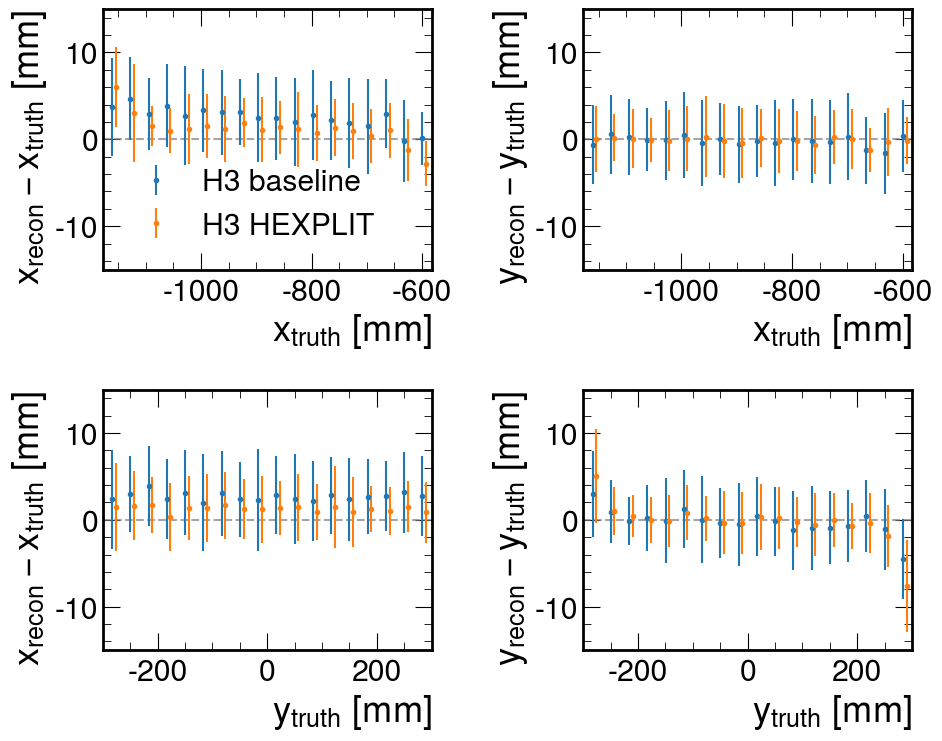

In [14]:
path="dd4hep/csv/truth_xy_w0_6_[0-9]*.csv"
files=glob.glob(path)
print(files)
df = pd.concat(map(pd.read_csv, files))

df=df.query("mc_pz>100")
xc,yc = center_position(*rowcol(df.x_truth,df.y_truth))

x_rel=df.x_truth-xc
y_rel=df.y_truth-yc
rel=x_rel,y_rel
truth=df.x_truth,df.y_truth
resid_rw=df.dx_rw,df.dy_rw
resid=df.dx,df.dy

fig, axs=plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        plt.sca(axs[i][j])
        plt.axhline(0, color='0.5', alpha=0.7, ls='--')
        plt.xlabel(f"${'xy'[i]}_{{\\rm truth}}$ [mm]")
        plt.ylabel(f"${'xy'[j]}_{{\\rm recon}}-{'xy'[j]}_{{\\rm truth}}$ [mm]")
        partitions=np.linspace(min(truth[i]), max(truth[i]), 19)
        print(partitions)
        shift=0
        for resid_set,label in (resid, "H3 baseline"), (resid_rw, "H3 HEXPLIT"):
            mean_resids=[]
            std_resids=[]
            bin_centers=[]
            for k in range(len(partitions)-1):
                #print(rel[i])
                slc = (truth[i]>partitions[k])&(truth[i]<partitions[k+1])

                a=resid_set[j][slc]
                mean_std=get_mean_std(a)
                mean_resids.append(mean_std[0])
                std_resids.append(mean_std[1])
                bin_centers.append((partitions[k]+partitions[k+1])/2+shift)
            plt.errorbar(bin_centers, mean_resids, std_resids, ls='', marker='o', ms=3, label=label)
            plt.ylim(-15, 15)
            plt.xlim(partitions[0], partitions[-1])
            shift+=0.2*(bin_centers[1]-bin_centers[0])
    

axs[0][0].legend()
plt.tight_layout()
plt.show()